In [1]:
import cv2, os, argparse, random
from tqdm import tqdm
import torch
import numpy as np
from helpers import corresponding_label_to_video,get_rtf_text
from model import EventClassifier
#get metrics from sklearn
from sklearn.metrics import classification_report, confusion_matrix


e:\2025_ICIAP_FIRE\onfire_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


videos_path = 'E:/2025_ICIAP_FIRE/dataset'
labels_path = 'E:/2025_ICIAP_FIRE/GT'
video_files, label_files = corresponding_label_to_video(videos_path, labels_path)
if len(video_files) == 0:
    print("No videos found in the specified directory.")
    exit(1)
print(f"Found {len(video_files)} videos in {videos_path} and {len(label_files)} labels in {labels_path}")

frames_list = []
labels_list = []
for i in range(len(video_files)):
    video_files[i] = os.path.join(videos_path, video_files[i])
    label_files[i] = os.path.join(labels_path, label_files[i])
    #get total number of frames in the video
    cap = cv2.VideoCapture(video_files[i])
    if not cap.isOpened():
        print(f"Error opening video file {video_files[i]}")
        continue
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_list.append(total_frames)
    cap.release()

Found 353 video files and 353 label files.
Found 353 videos in E:/2025_ICIAP_FIRE/dataset and 353 labels in E:/2025_ICIAP_FIRE/GT


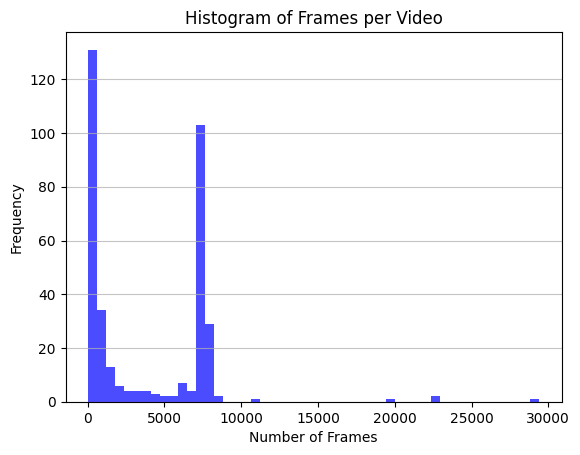

In [3]:
#plaot histogram of frames
import matplotlib.pyplot as plt
plt.hist(frames_list, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Frames per Video')
plt.xlabel('Number of Frames')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()